# Own A* visualization

In this notebook the benchmarks of my own A* implementation are visualized.

Furthermore the error between the A* LCPC prediction and the true LCPC is calculated and visualized. (This was a bit of an afterthought)

1. [Unweighted results](#Unweighted-results)
    1. [SSSTP-UNW](#SSSTP-UNW)
    2. [SSSTP-UNW 11528260_9708000 explored visualization](#SSSTP-UNW-11528260_9708000-explored-visualization)
2. [Weighted results](#Weighted-results)
    1. [SSSTP-W](#SSSTP-W)
    3. [SSSTP-W 11528260_9708000 explored visualization](#SSSTP-W-11528260_9708000-explored-visualization)


In [12]:
import numpy as np
import scipy as sp
import pandas as pd
import time
import networkit as nk #used for check_cost

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Computer Modern']

In [14]:
def mean_std_max_min(series):
    print(series.mean())
    print(series.std())
    print(series.max())
    print(series.min())

In [15]:
adj = sp.sparse.load_npz('data/mb_50m_cost0-union_adj-COO-arr.npz')
t_start = time.time()
nk_graph = nk.graph.Graph(adj.shape[0], weighted=True, directed=False) #create empty graph of correct size
#add edges
for i, j, v in zip(adj.row, adj.col, adj.data):
    nk_graph.addEdge(i, j, v)
t_elapsed = time.time()-t_start
print(t_elapsed)

36.84627175331116


In [16]:
#this function computes the true lcpcs, to be able to calculate accuracy/error 
def check_cost(df):
    df['gtruth'] = 0.0
    for ind,(s,t) in enumerate(zip(df.source, df.target)): 
        BiDi = nk.distance.BidirectionalDijkstra(nk_graph,source=int(s),storePred=True,target=int(t))
        BiDi.run()
        BiDi.getDistance()
        true_cost=BiDi.getDistance()
        df.loc[ind,'gtruth']=true_cost
    return df

## Unweighted results

### SSSTP-UNW

In [34]:
ssst_df = pd.read_csv('data/bench/a-star_self/SSST_res_20.csv',index_col=0)
ssst_df

source      target  distance        time  vert_tchd
0   18758740.0  13416169.0  2.219503   26.977443   391106.0
1   13263111.0  14745901.0  0.716209    1.700262    24334.0
2    3482306.0   7722609.0  2.390673   21.560611   379920.0
3   10299697.0  20527419.0  4.620225  101.189796  1755947.0
4   12048881.0  13477170.0  1.483873    1.362372    20499.0
5   16553578.0  17688751.0  1.266231    8.314330   146230.0
6   20311403.0  13071025.0  3.467585   88.904295  1407395.0
7   17092273.0   3437856.0  6.342350  385.562412  5943733.0
8   11098857.0  18542819.0  3.667599   39.990919   711260.0
9    4530680.0  10180717.0  2.665630   30.788731   568349.0
10  11416228.0  18118033.0  3.573898   52.830013   905603.0
11   8437129.0  10602934.0  1.774815   18.070188   318796.0
12  15790215.0  14234499.0  1.736280   18.469675   302251.0
13   8558802.0  19303943.0  5.555515  185.997556  3187722.0
14   6163588.0  21461026.0  8.644422  420.889550  7233444.0
15  15831163.0  18800466.0  1.262859    8.820610   148677.0
16   5209209.0   4128582.0  3.506727   84.260319  1608504.0
17  15488303.0   7144785.0  3.703546  101.181269  1524863.0
18  14946741.0   2900733.0  5.721705  201.507009  2915170.0
19  15352814.0  10453398.0  2.254116   48.272036   727728.0

In [18]:
print((ssst_df.time/ssst_df.distance).mean())
print((ssst_df.time/ssst_df.distance).std())
print('')
print(((ssst_df.vert_tchd*10**(-5))/ssst_df.distance).mean())
print(((ssst_df.vert_tchd*10**(-5))/ssst_df.distance).std())

19.727685800522515
15.52296998716479

3.233391618190479
2.4754785858733706


In [19]:
checked=check_cost(ssst_df)

In [25]:
checked

source      target  distance        time  vert_tchd    gtruth
0   18758740.0  13416169.0  2.219503   26.977443   391106.0  2.219503
1   13263111.0  14745901.0  0.716209    1.700262    24334.0  0.716209
2    3482306.0   7722609.0  2.390673   21.560611   379920.0  2.390673
3   10299697.0  20527419.0  4.620225  101.189796  1755947.0  4.620225
4   12048881.0  13477170.0  1.483873    1.362372    20499.0  1.483873
5   16553578.0  17688751.0  1.266231    8.314330   146230.0  1.266231
6   20311403.0  13071025.0  3.467585   88.904295  1407395.0  3.467585
7   17092273.0   3437856.0  6.342350  385.562412  5943733.0  6.342350
8   11098857.0  18542819.0  3.667599   39.990919   711260.0  3.667599
9    4530680.0  10180717.0  2.665630   30.788731   568349.0  2.665630
10  11416228.0  18118033.0  3.573898   52.830013   905603.0  3.573898
11   8437129.0  10602934.0  1.774815   18.070188   318796.0  1.774815
12  15790215.0  14234499.0  1.736280   18.469675   302251.0  1.736280
13   8558802.0  19303943.0  5.555515  185.997556  3187722.0  5.555515
14   6163588.0  21461026.0  8.644422  420.889550  7233444.0  8.644422
15  15831163.0  18800466.0  1.262859    8.820610   148677.0  1.262859
16   5209209.0   4128582.0  3.506727   84.260319  1608504.0  3.506727
17  15488303.0   7144785.0  3.703546  101.181269  1524863.0  3.703546
18  14946741.0   2900733.0  5.721705  201.507009  2915170.0  5.721705
19  15352814.0  10453398.0  2.254116   48.272036   727728.0  2.254116

In [20]:
err= checked.distance-checked.gtruth
print(err.mean())
print(err.std())
print('')
print(err.abs().mean())
print(err.abs().std())
print('')
print((err.abs()/checked.gtruth).mean())
print((err.abs()/checked.gtruth).std())

#can be assumed as zero, there can't exist a negative error with A* only a positive. idk why that happens with identical numbers?

-6.661338147750939e-17
2.0503166206534444e-16

1.1102230246251565e-16
1.836686784592059e-16

4.7461530659594515e-17
7.630094870260869e-17


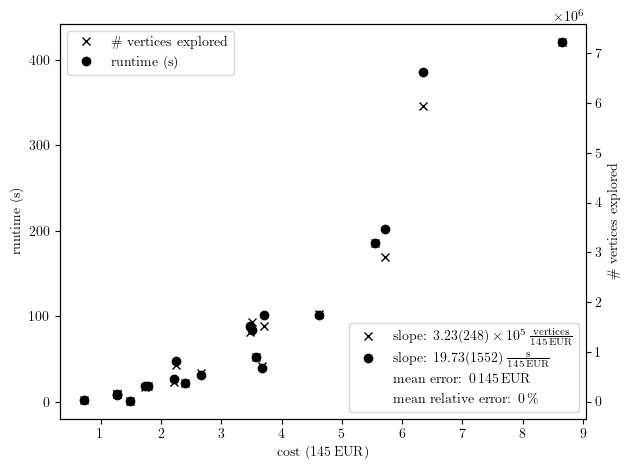

In [35]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(ssst_df.distance, ssst_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'\# vertices explored')
vert =ax2.plot(ssst_df.distance, ssst_df.vert_tchd, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label='\\# vertices explored',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label='runtime (s)',linestyle='')
ax1.legend(handles=[x,o])

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $3.23(248) \times 10^5 \, \frac{\mathrm{vertices}}{145\, \mathrm{EUR}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $19.73(1552) \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
abso = mlines.Line2D([], [], color='black', marker='', label=r'mean error: $0 \, 145\, \mathrm{EUR}$',linestyle='')
rerr = mlines.Line2D([], [], color='black', marker='', label=r'mean relative error: $0\, \%$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope,abso,rerr],loc=4)

fig.tight_layout()
plt.savefig('data/vis/a-star_self/a-self_SSST_res_20.pdf', format='pdf')
plt.show()

In [21]:
print((ssst_df.time/(ssst_df.vert_tchd*10**(-6))).mean())
print((ssst_df.time/(ssst_df.vert_tchd*10**(-6))).std())

61.05819509767158
5.373401344353669


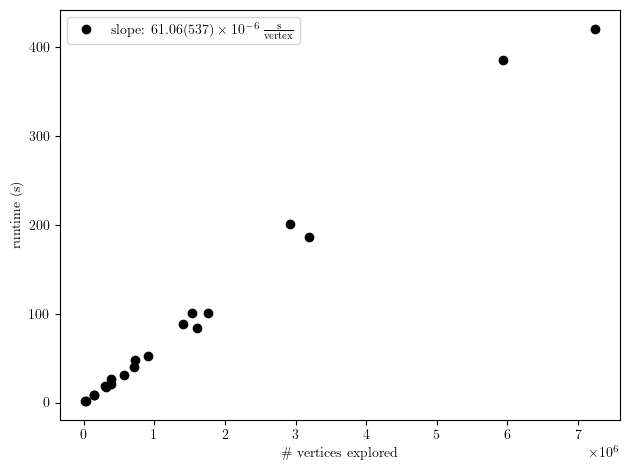

In [22]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'\# vertices explored')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(ssst_df.vert_tchd, ssst_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $61.06(537) \times 10^{-6} \, \frac{\mathrm{s}}{\mathrm{vertex}}$',linestyle='')
ax1.legend(handles=[o_slope])
fig.tight_layout()
plt.savefig('data/vis/a-star_self/a-self_SSST_res_20_vert-t.pdf', format='pdf')
plt.show()

### SSSTP-UNW 11528260_9708000 explored visualization

In [9]:
dist = visited=np.load(f'data/bench/a-star_self/11528260_9708000.npy',allow_pickle=True)[:,0]
print(dist[11528260])
print(dist[9708000])


0.0
3.015566669171676


In [10]:
visited=np.load(f'data/bench/a-star_self/11528260_9708000.npy',allow_pickle=True)[:,1]
#visited = visited.astype(int)
visited

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
visited.sum()

767004.0

In [12]:
predecessors=np.load(f'data/bench/a-star_self/11528260_9708000.npy',allow_pickle=True)[:,2]
predecessors = predecessors.astype(int)
predecessors

array([-1, -1, -1, ..., -1, -1, -1])

In [13]:
path=np.zeros(5100*4520)
ind = 9708000
path[ind] = 1
while not (ind == 11528260):
    path[predecessors[ind]] = 1
    ind=predecessors[ind]
path[path==0] = np.nan
path

array([nan, nan, nan, ..., nan, nan, nan])

In [14]:
path_c = np.zeros(5100*4520)
path_c[path==1] = 1
y,x = np.nonzero(path_c.reshape((5100,4520)))

In [15]:
path_c.sum()

1374.0

In [16]:
perm = x.argsort()
x_sort = x[perm]
y_sort = y[perm]

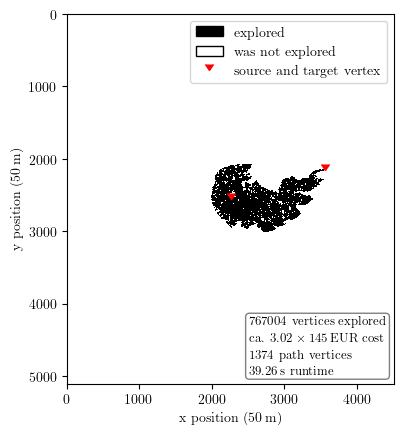

In [17]:
plt.imshow(visited.reshape((5100,4520)), cmap='binary', vmin=0, vmax=1, interpolation='none')
#plt.imshow(path.reshape((5100,4520)), cmap='OrRd', vmin=0, vmax=1, interpolation='none')
#plt.plot(x_sort,y_sort)
#plt.colorbar(label=r'distance $(145\, \mathrm{EUR}) $')
plt.plot(2260,2550, color='red',marker=7,linestyle='')
plt.plot(3560,2147, color='red',marker=7,linestyle='')
patches = [mpatches.Patch(color='black', label='explored'),mpatches.Patch(facecolor='white', label='was not explored',edgecolor='black'),mlines.Line2D([], [], color='red', marker=7, label=r'source and target vertex',linestyle='')]
plt.legend(handles=patches, loc=1)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')

text=  (r'\noindent 767004 vertices explored $\newline$'
        r'ca. $3.02 \times 145\, \mathrm{EUR}$ cost \newline'
        r'1374 path vertices \newline'
        r'$39.26 \, \mathrm{s}$ runtime\newline')

plt.text(4400,4300 , text, fontsize=9, bbox=dict(boxstyle='round', fc='white', ec='black',alpha=0.5),  horizontalalignment='right')

plt.savefig('data/vis/a-star_self/a-self_11528260_9708000_vis.pdf', format='pdf')
plt.show()

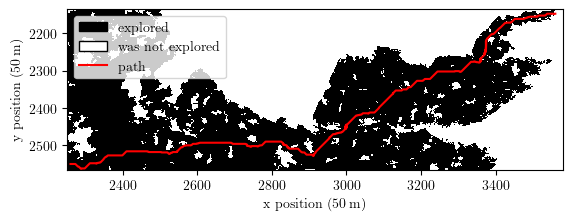

In [18]:
plt.imshow(visited.reshape((5100,4520)), cmap='binary', vmin=0, vmax=1, interpolation='none')
#plt.imshow(path.reshape((5100,4520)), cmap='OrRd', vmin=0, vmax=1, interpolation='none')
#plt.colorbar(label=r'distance $(145\, \mathrm{EUR}) $')
plt.plot(x_sort,y_sort, color ='red',linestyle='solid')
#plt.plot(2260,2550, color='red',marker='x',linestyle='')
#plt.plot(3560,2147, color='red',marker='x',linestyle='')
patches = [mpatches.Patch(color='black', label='explored'),mpatches.Patch(facecolor='white', label='was not explored',edgecolor='black'),mlines.Line2D([], [], color='red', marker='', label=r'path',linestyle='solid')]
plt.legend(handles=patches, loc=2)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.xlim(2250, 3580)
plt.ylim(2565,2135)
plt.savefig('data/vis/a-star_self/a-self_11528260_9708000_vis_zoom.pdf', format='pdf')
plt.show()

In [19]:
dist_load=np.load(f'data/bench/dijkstra_self/SSSP_11528260.npy',allow_pickle=True)[:,0]
dist_load[dist_load==np.inf] = np.nan
dist_load

array([nan, nan, nan, ..., nan, nan, nan])

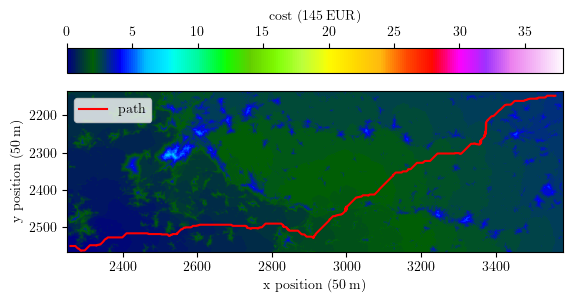

In [20]:
plt.imshow(dist_load.reshape((5100,4520)), cmap='gist_ncar', vmin=0.0, vmax=np.nanmax(dist_load), interpolation='none')
plt.colorbar(label=r'cost $(145\, \mathrm{EUR}) $',location='top')
plt.plot(x_sort,y_sort, color ='red',linestyle='solid')
patches = [mlines.Line2D([], [], color='red', marker='', label=r'path',linestyle='solid')]
plt.legend(handles=patches, loc=2)
plt.xlim(2250, 3580)
plt.ylim(2565,2135)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.savefig('data/vis/a-star_self/a-self_11528260_9708000_vis_zoom_SSSP.pdf', format='pdf')
plt.show()

## Weighted results

### SSSTP-W

In [28]:
ssst_df = pd.read_csv('data/bench/a-star_self/SSST_weight_res_20.csv',index_col=0)
ssst_df

source      target  distance        time  vert_tchd
0   10772437.0  20279216.0  4.541161   29.632267   478101.0
1   12845045.0  14017005.0  6.431630  125.873538  2013587.0
2   10679341.0  13779897.0  1.590405    5.013035    90746.0
3   20513826.0  16016122.0  2.004525    6.662055   109247.0
4   14015507.0  19190301.0  2.596396   19.174054   322128.0
5   17846943.0  19359903.0  4.101383  142.479165  2788250.0
6   20464296.0  17301618.0  2.987467   25.338890   423412.0
7   13274742.0  19654801.0  4.912754   10.966114   192181.0
8   10664886.0   9014279.0  2.112480   17.801882   334869.0
9   14659507.0  15225765.0  2.562396   21.037082   355075.0
10   6014590.0  21586101.0  7.058211  127.206641  2128270.0
11  16626242.0  16279856.0  3.250147   10.131854   161122.0
12   3135646.0  17232070.0  7.217901  154.664535  2719484.0
13  18790105.0   9982343.0  5.115524   51.887734   874996.0
14  11286145.0   5815428.0  3.632018   11.096313   198550.0
15  21767701.0   7495457.0  8.822279  312.337735  5860281.0
16  18109445.0  17979400.0  1.861596    3.449448    52548.0
17   1837946.0  18809110.0  8.198953  111.645394  1911545.0
18  11067450.0  16991892.0  3.733808   15.926427   300100.0
19   5235761.0  16749151.0  5.676290   93.625467  1644963.0

In [29]:
print((ssst_df.time/ssst_df.distance).mean())
print((ssst_df.time/ssst_df.distance).std())
print('')
print(((ssst_df.vert_tchd*10**(-5))/ssst_df.distance).mean())
print(((ssst_df.vert_tchd*10**(-5))/ssst_df.distance).std())

11.472290166251616
10.077106281272744

2.0305714103255084
1.903747812276656


In [30]:
checked=check_cost(ssst_df)

In [31]:
err= checked.distance-checked.gtruth
print(err.mean())
print(err.std())
print('')
print(err.abs().mean())
print(err.abs().std())
print('')
print((err.abs()/checked.gtruth).mean())
print((err.abs()/checked.gtruth).std())

0.19998748745420025
0.10735655062108296

0.19998748745420025
0.10735655062108296

0.04795744816878865
0.013839476131727382


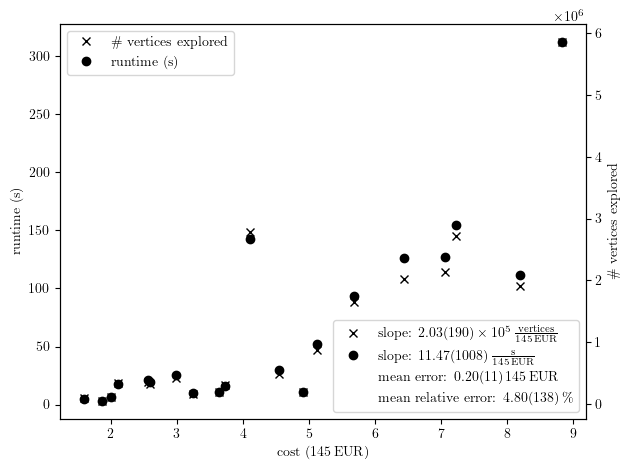

In [33]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'cost $(145\, \mathrm{EUR}) $')
ax1.set_ylabel(r'runtime (s)')
time = ax1.plot(ssst_df.distance, ssst_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'\# vertices explored')
vert =ax2.plot(ssst_df.distance, ssst_df.vert_tchd, marker='x',linestyle = '',color='black')
ax2.tick_params(axis='y')

x = mlines.Line2D([], [], color='black', marker='x', label='\\# vertices explored',linestyle='')
o = mlines.Line2D([], [], color='black', marker='o', label='runtime (s)',linestyle='')
ax1.legend(handles=[x,o])

x_slope = mlines.Line2D([], [], color='black', marker='x', label=r'slope: $2.03(190) \times 10^5 \, \frac{\mathrm{vertices}}{145\, \mathrm{EUR}}$',linestyle='')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $11.47(1008) \, \frac{\mathrm{s}}{145\, \mathrm{EUR}}$',linestyle='')
abso = mlines.Line2D([], [], color='black', marker='', label=r'mean error: $0.20(11) \, 145\, \mathrm{EUR}$',linestyle='')
rerr = mlines.Line2D([], [], color='black', marker='', label=r'mean relative error: $4.80(138)\, \%$',linestyle='')
legend2 = plt.legend(handles=[x_slope,o_slope,abso,rerr],loc=4)

fig.tight_layout()
plt.savefig('data/vis/a-star_self/a-self_SSST_weight_res_20.pdf', format='pdf')
plt.show()

In [34]:
print((ssst_df.time/(ssst_df.vert_tchd*10**(-6))).mean())
print((ssst_df.time/(ssst_df.vert_tchd*10**(-6))).std())

58.13493403620519
3.784293559006276


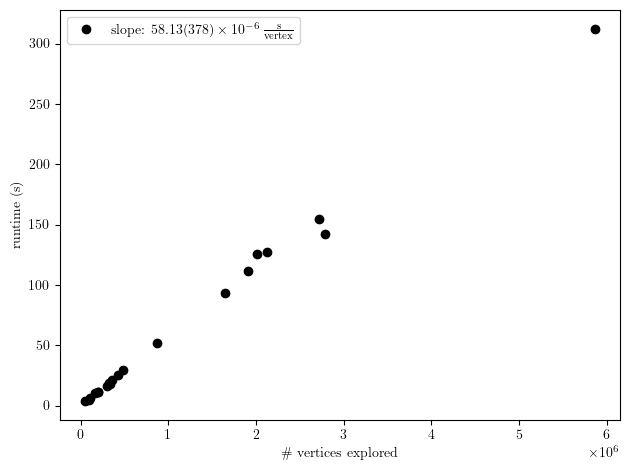

In [36]:
fig, ax1 = plt.subplots()
ax1.set_xlabel(r'\# vertices explored')
ax1.set_ylabel(r'runtime (s)')
ax1.plot(ssst_df.vert_tchd, ssst_df.time, marker='o', linestyle = '',color='black')
ax1.tick_params(axis='y')
o_slope = mlines.Line2D([], [], color='black', marker='o', label=r'slope: $58.13(378) \times 10^{-6} \, \frac{\mathrm{s}}{\mathrm{vertex}}$',linestyle='')
ax1.legend(handles=[o_slope])
fig.tight_layout()
plt.savefig('data/vis/a-star_self/a-self_SSST_weight_res_20_vert-t.pdf', format='pdf')
plt.show()

### SSSTP-W 11528260_9708000 explored visualization

In [24]:
dist = visited=np.load(f'data/bench/a-star_self/11528260_9708000_weight.npy',allow_pickle=True)[:,0]
print(dist[11528260])
print(dist[9708000])

0.0
3.139188230736181


In [25]:
visited=np.load(f'data/bench/a-star_self/11528260_9708000_weight.npy',allow_pickle=True)[:,1]
#visited = visited.astype(int)
visited

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
visited.sum()

433893.0

In [27]:
predecessors=np.load(f'data/bench/a-star_self/11528260_9708000_weight.npy',allow_pickle=True)[:,2]
predecessors = predecessors.astype(int)
predecessors

array([-1, -1, -1, ..., -1, -1, -1])

In [28]:
path=np.zeros(5100*4520)
ind = 9708000
path[ind] = 1
while not (ind == 11528260):
    path[predecessors[ind]] = 1
    ind=predecessors[ind]
path[path==0] = np.nan
path

array([nan, nan, nan, ..., nan, nan, nan])

In [29]:
path_c = np.zeros(5100*4520)
path_c[path==1] = 1
y,x = np.nonzero(path_c.reshape((5100,4520)))
perm = x.argsort()
x_sort = x[perm]
y_sort = y[perm]

In [30]:
path_c.sum()

1389.0

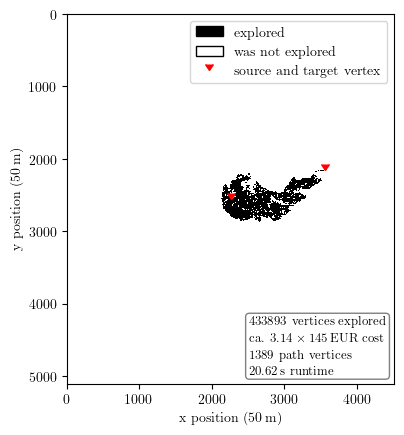

In [31]:
plt.imshow(visited.reshape((5100,4520)), cmap='binary', vmin=0, vmax=1, interpolation='none')
#plt.imshow(path.reshape((5100,4520)), cmap='OrRd', vmin=0, vmax=1, interpolation='none')
#plt.plot(x_sort,y_sort)
#plt.colorbar(label=r'distance $(145\, \mathrm{EUR}) $')
plt.plot(2260,2550, color='red',marker=7,linestyle='')
plt.plot(3560,2147, color='red',marker=7,linestyle='')
patches = [mpatches.Patch(color='black', label='explored'),mpatches.Patch(facecolor='white', label='was not explored',edgecolor='black'),mlines.Line2D([], [], color='red', marker=7, label=r'source and target vertex',linestyle='')]
plt.legend(handles=patches, loc=1)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')


text=  (r'\noindent 433893 vertices explored $\newline$'
        r'ca. $3.14 \times 145\, \mathrm{EUR}$ cost \newline'
        r'1389 path vertices \newline'
        r'$20.62 \, \mathrm{s}$ runtime\newline')

plt.text(4400,4300 , text, fontsize=9, bbox=dict(boxstyle='round', fc='white', ec='black',alpha=0.5),  horizontalalignment='right')


plt.savefig('data/vis/a-star_self/a-self_11528260_9708000_weight_vis.pdf', format='pdf')
plt.show()

In [32]:
plt.imshow(visited.reshape((5100,4520)), cmap='binary', vmin=0, vmax=1, interpolation='none')
#plt.imshow(path.reshape((5100,4520)), cmap='OrRd', vmin=0, vmax=1, interpolation='none')
#plt.colorbar(label=r'distance $(145\, \mathrm{EUR}) $')
plt.plot(x_sort,y_sort, color ='red',linestyle='solid')
#plt.plot(2260,2550, color='red',marker='x',linestyle='')
#plt.plot(3560,2147, color='red',marker='x',linestyle='')
patches = [mpatches.Patch(color='black', label='explored'),mpatches.Patch(facecolor='white', label='was not explored',edgecolor='black'),mlines.Line2D([], [], color='red', marker='', label=r'path',linestyle='solid')]
plt.legend(handles=patches, loc=2)
plt.xlabel(r'x position $(50\, \mathrm{m}) $')
plt.ylabel(r'y position $(50\, \mathrm{m}) $')
plt.xlim(2250, 3580)
plt.ylim(2565,2135)
plt.savefig('data/vis/a-star_self/a-self_11528260_9708000_weight_vis_zoom.pdf', format='pdf')
plt.show()